In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2895 non-null   int64  
 1   MSZoning       2895 non-null   object 
 2   LotFrontage    2895 non-null   float64
 3   LotArea        2895 non-null   int64  
 4   Street         2895 non-null   object 
 5   LotShape       2895 non-null   object 
 6   LandContour    2895 non-null   object 
 7   Utilities      2895 non-null   object 
 8   LotConfig      2895 non-null   object 
 9   LandSlope      2895 non-null   object 
 10  Neighborhood   2895 non-null   object 
 11  Condition1     2895 non-null   object 
 12  Condition2     2895 non-null   object 
 13  BldgType       2895 non-null   object 
 14  HouseStyle     2895 non-null   object 
 15  OverallQual    2895 non-null   int64  
 16  OverallCond    2895 non-null   int64  
 17  YearBuilt      2895 non-null   int64  
 18  YearRemo

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support vector regression

In [58]:
from sklearn.svm import SVR,LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [105]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [169]:
param_grid = {'C':[1000000],
             'kernel':['rbf'],
              'gamma':['scale', 'auto'],
              'epsilon':[0, 0.001, 0.01, 0.1, 1]}

In [170]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [171]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000000], 'epsilon': [0, 0.001, 0.01, 0.1, 1],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [172]:
grid.best_params_

{'C': 1000000, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [173]:
y_pred = grid.predict(scaled_X_test)

In [174]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [175]:
r2_score(y_test,y_pred)

0.8496522038889655

In [176]:
MAE

17753.748564069323

In [177]:
RMSE

27770.63296888162

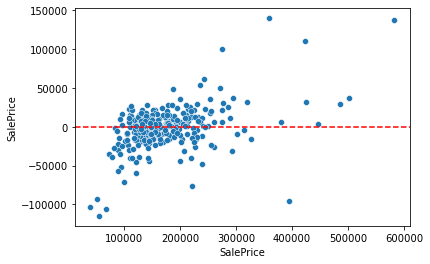

In [178]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [179]:
test_residuals.sort_values(ascending=False)

596     139940.578357
788     137783.045620
651     110573.555593
1399     99821.899155
320      61423.361604
            ...      
695     -93266.653983
971     -96052.485444
522    -103589.891691
391    -105914.198109
691    -114802.545479
Name: SalePrice, Length: 288, dtype: float64

In [180]:
from sklearn.model_selection import cross_validate

In [181]:
scores = cross_validate(grid,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',
                                  'neg_mean_squared_error', 'max_error'],cv=5)

In [182]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error,test_max_error
0,13.397055,0.061636,-19626.478808,-30845.577174,-9.514496e+08,-174765.159695
1,14.234525,0.047108,-21211.680823,-36849.809822,-1.357908e+09,-253610.002664
2,13.994566,0.066677,-19133.422040,-30413.973706,-9.250098e+08,-201967.869789
3,13.525852,0.048310,-19622.101779,-34438.280789,-1.185995e+09,-287212.449537
4,12.822237,0.042122,-22287.123287,-34949.190508,-1.221446e+09,-163461.486563


In [183]:
pd.DataFrame(scores).mean()

fit_time                            1.359485e+01
score_time                          5.317068e-02
test_neg_mean_absolute_error       -2.037616e+04
test_neg_root_mean_squared_error   -3.349937e+04
test_neg_mean_squared_error        -1.128362e+09
test_max_error                     -2.162034e+05
dtype: float64

In [200]:
final_model = SVR(C=500000, epsilon=0.1, gamma='auto', kernel='rbf')

In [201]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
sc_df_to_predict = scaler.fit_transform(df_to_predict)

In [202]:
final_model.fit(scaled_X,y)

SVR(C=500000, gamma='auto')

In [203]:
final_model.score(scaled_X,y)

0.9963850421116396

In [204]:
scores = cross_validate(final_model,scaled_X,y,
                         scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',
                                  'neg_mean_squared_error', 'max_error'],cv=5)

In [205]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [206]:
y_pred = cross_val_predict(final_model, scaled_X, y, cv=10)

In [207]:
r2_score(y,y_pred)

0.8214218058210485

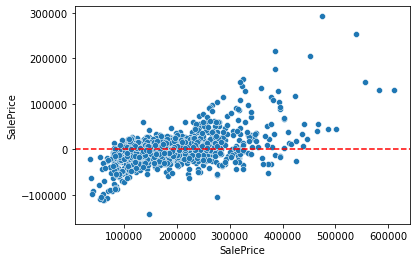

In [208]:
test_residuals = y - y_pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

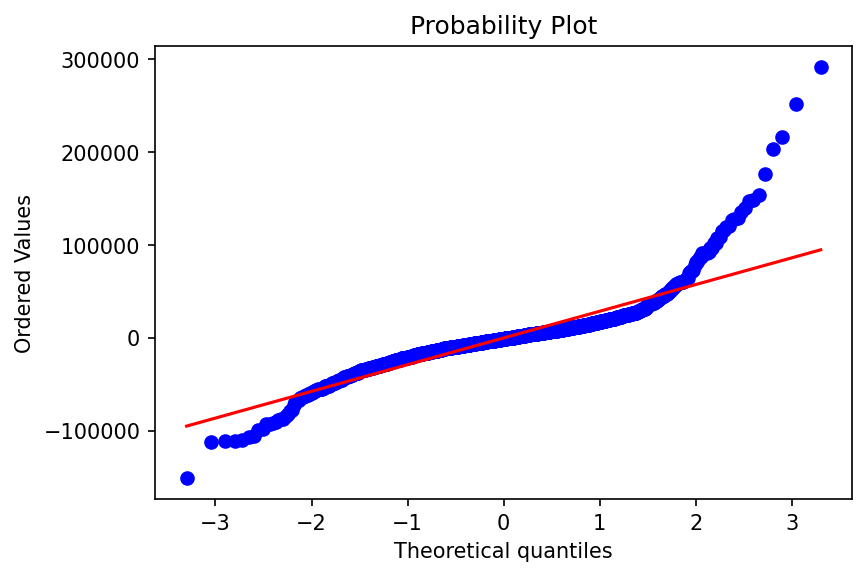

In [199]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
_ = sp.stats.probplot(test_residuals,plot=ax);

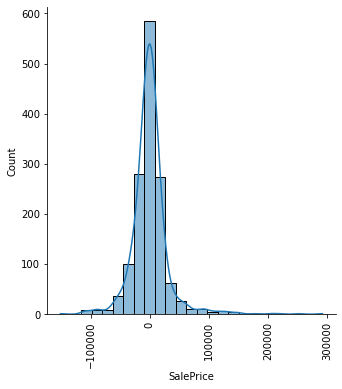

In [194]:
sns.displot(test_residuals, bins=25, kde=True)
plt.xticks(rotation=90);

In [195]:
test_residuals.sort_values()

1302   -151296.632473
260    -111835.516807
368    -111240.751967
403    -110879.414766
691    -109324.038225
            ...      
53      177053.947675
579     203549.562311
810     216520.473376
754     252064.873431
185     292180.094536
Name: SalePrice, Length: 1436, dtype: float64

In [209]:
test = pd.read_csv('test.csv')

In [210]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [211]:
result = final_model.predict(sc_df_to_predict)

In [212]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':result})

In [213]:
submission['SalePrice'] = submission['SalePrice'].astype(int)
print(submission.shape)

(1459, 2)


In [214]:
filename = 'house_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: house_preds.csv
